# Project: Wrangling and Analyze Data

## Data Gathering

1. We will directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


2. Using the Requests library I will download the tweet image prediction (image_predictions.tsv)

In [3]:
import io
import requests

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(url).content
open('image_predictions.tsv', 'wb').write(r)
image_predictions = pd.read_csv(io.StringIO(r.decode('utf-8')), sep = '\t')

In [4]:
image_predictions.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


 Using the Tweepy library I'll query additional data via the Twitter API (tweet_json.txt) <br>
###### Gathering walk through process
> Below lines of code is to query Twitter's API to retrieve addtitional analysis required for this project. <br><br>
> Although I am most interested in the tweet ids, retweet count and favorite count, I will go ahead and scan the data (manually - just to get a good feel of what the data looks like) for any other columns to check for any additional data that can be useful; *this is done after successfully querying and writing the data into a txt file as shown below*

In [5]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [6]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

authentication = OAuthHandler(consumer_key, consumer_secret)
authentication.set_access_token(access_token, access_secret)

api = tweepy.API(authentication, wait_on_rate_limit=True)

tweets_id = twitter_archive.tweet_id.values
len(tweets_id)

count = 0
fails_dict = {}
start = timer()

with open('tweet_json.txt', 'w') as txtfile:

    for tweet_id in tweets_id:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            print("Success")
            json.dump(tweet._json, txtfile)
            txtfile.write('\n')
        except:
            print("Unsuccessful")
            pass
           
end = timer()
print(end - start)


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Unsuccessful
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 88605416

Success
259: 843604394117681152
Success
260: 843235543001513987
Success
261: 842892208864923648
Unsuccessful
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Suc

Success
515: 811627233043480576
Success
516: 811386762094317568
Success
517: 810984652412424192
Success
518: 810896069567610880
Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success


Success
771: 776819012571455488
Success
772: 776813020089548800
Success
773: 776477788987613185
Success
774: 776249906839351296
Success
775: 776218204058357768
Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Unsuccessful
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Suc

Rate limit reached. Sleeping for: 263


Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success
932: 754120377874386944
Success


Success
1154: 725729321944506368
Success
1155: 725458796924002305
Success
1156: 724983749226668032
Success
1157: 724771698126512129
Success
1158: 724405726123311104
Success
1159: 724049859469295616
Success
1160: 724046343203856385
Success
1161: 724004602748780546
Success
1162: 723912936180330496
Success
1163: 723688335806480385
Success
1164: 723673163800948736
Success
1165: 723179728551723008
Success
1166: 722974582966214656
Success
1167: 722613351520608256
Success
1168: 721503162398597120
Success
1169: 721001180231503872
Success
1170: 720785406564900865
Success
1171: 720775346191278080
Success
1172: 720415127506415616
Success
1173: 720389942216527872
Success
1174: 720340705894408192
Success
1175: 720059472081784833
Success
1176: 720043174954147842
Success
1177: 719991154352222208
Success
1178: 719704490224398336
Success
1179: 719551379208073216
Success
1180: 719367763014393856
Success
1181: 719339463458033665
Success
1182: 719332531645071360
Success
1183: 718971898235854848
Success
11

Success
1403: 699423671849451520
Success
1404: 699413908797464576
Success
1405: 699370870310113280
Success
1406: 699323444782047232
Success
1407: 699088579889332224
Success
1408: 699079609774645248
Success
1409: 699072405256409088
Success
1410: 699060279947165696
Success
1411: 699036661657767936
Success
1412: 698989035503689728
Success
1413: 698953797952008193
Success
1414: 698907974262222848
Success
1415: 698710712454139905
Success
1416: 698703483621523456
Success
1417: 698635131305795584
Success
1418: 698549713696649216
Success
1419: 698355670425473025
Success
1420: 698342080612007937
Success
1421: 698262614669991936
Success
1422: 698195409219559425
Success
1423: 698178924120031232
Success
1424: 697995514407682048
Success
1425: 697990423684476929
Success
1426: 697943111201378304
Success
1427: 697881462549430272
Success
1428: 697630435728322560
Success
1429: 697616773278015490
Success
1430: 697596423848730625
Success
1431: 697575480820686848
Success
1432: 697516214579523584
Success
14

Success
1652: 683498322573824003
Success
1653: 683481228088049664
Success
1654: 683462770029932544
Success
1655: 683449695444799489
Success
1656: 683391852557561860
Success
1657: 683357973142474752
Success
1658: 683142553609318400
Success
1659: 683111407806746624
Success
1660: 683098815881154561
Success
1661: 683078886620553216
Success
1662: 683030066213818368
Success
1663: 682962037429899265
Success
1664: 682808988178739200
Success
1665: 682788441537560576
Success
1666: 682750546109968385
Success
1667: 682697186228989953
Success
1668: 682662431982772225
Success
1669: 682638830361513985
Success
1670: 682429480204398592
Success
1671: 682406705142087680
Success
1672: 682393905736888321
Success
1673: 682389078323662849
Success
1674: 682303737705140231
Success
1675: 682259524040966145
Success
1676: 682242692827447297
Success
1677: 682088079302213632
Success
1678: 682059653698686977
Success
1679: 682047327939461121
Success
1680: 682032003584274432
Success
1681: 682003177596559360
Success
16

Success
1901: 674664755118911488
Success
1902: 674646392044941312
Success
1903: 674644256330530816
Success
1904: 674638615994089473
Success
1905: 674632714662858753
Success
1906: 674606911342424069
Success
1907: 674468880899788800
Success
1908: 674447403907457024
Success
1909: 674436901579923456
Success
1910: 674422304705744896
Success
1911: 674416750885273600
Success
1912: 674410619106390016
Success
1913: 674394782723014656
Success
1914: 674372068062928900
Success
1915: 674330906434379776
Success
1916: 674318007229923329
Success
1917: 674307341513269249
Success
1918: 674291837063053312
Success
1919: 674271431610523648
Success
1920: 674269164442398721
Success
1921: 674265582246694913
Success
1922: 674262580978937856
Success
1923: 674255168825880576
Success
1924: 674082852460433408
Success
1925: 674075285688614912
Success
1926: 674063288070742018
Success
1927: 674053186244734976
Success
1928: 674051556661161984
Success
1929: 674045139690631169
Success
1930: 674042553264685056
Success
19

Success
2150: 669684865554620416
Success
2151: 669683899023405056
Success
2152: 669682095984410625
Success
2153: 669680153564442624
Success
2154: 669661792646373376
Success
2155: 669625907762618368
Success
2156: 669603084620980224
Success
2157: 669597912108789760
Success
2158: 669583744538451968
Success
2159: 669573570759163904
Success
2160: 669571471778410496
Success
2161: 669567591774625800
Success
2162: 669564461267722241
Success
2163: 669393256313184256
Success
2164: 669375718304980992
Success
2165: 669371483794317312
Success
2166: 669367896104181761
Success
2167: 669363888236994561
Success
2168: 669359674819481600
Success
2169: 669354382627049472
Success
2170: 669353438988365824
Success
2171: 669351434509529089
Success
2172: 669328503091937280
Success
2173: 669327207240699904
Success
2174: 669324657376567296
Success
2175: 669216679721873412
Success
2176: 669214165781868544
Success
2177: 669203728096960512
Success
2178: 669037058363662336
Success
2179: 669015743032369152
Success
21

In [7]:
import json
data = [json.loads(line) for line in open('tweet_json.txt', 'r')]
tweets_df = pd.DataFrame(data)
tweets_df

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2322,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2323,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2324,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2325,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


In [8]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2327 non-null   object 
 1   id                             2327 non-null   int64  
 2   id_str                         2327 non-null   object 
 3   full_text                      2327 non-null   object 
 4   truncated                      2327 non-null   bool   
 5   display_text_range             2327 non-null   object 
 6   entities                       2327 non-null   object 
 7   extended_entities              2057 non-null   object 
 8   source                         2327 non-null   object 
 9   in_reply_to_status_id          77 non-null     float64
 10  in_reply_to_status_id_str      77 non-null     object 
 11  in_reply_to_user_id            77 non-null     float64
 12  in_reply_to_user_id_str        77 non-null     o

> I have sucessfully created the dataset into a pandas DataFrame however upon scanning the data manually on my Jupyter notebook, I have found it a bit difficult to fully enjoy the process and so I will go ahead and export this data into a csv file and manually scan through using a spreadsheet application. *Please note I am able to do this because I can see as queried above that the dataset is not a large one (2327 rows)*

In [9]:
# doing this to scan the data manually to check if there will be any other useful columns I can make use of
tweets_df.to_csv('api_tweets.csv')

###### Gathering walk through process
>- I have scanned manually and I can now confirm that none of the other columns present will be of use to me in this task. <br><br>
>- I will then proceed to create a new DataFrame with only the tweet_id, retweet count and favorite count. This DataFrame will then be used for the rest of this project.

In [10]:
import os.path
from glob import glob

cols = ['tweet_id', 'retweet_count', 'favorite_count']
api_tweets_df = pd.DataFrame(columns = cols)

file_name='tweet_json.txt'
with open(file_name, encoding='utf8') as tweets:
    for line in tweets:
        tweets_data =json.loads(line)
        col_list =({'tweet_id':tweets_data['id'], 'retweet_count':tweets_data['retweet_count'], 'favorite_count':tweets_data['favorite_count']})
        api_tweets_df = api_tweets_df.append(col_list, ignore_index=True)

In [11]:
api_tweets_df.head(3)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7016,33820
1,892177421306343426,5302,29340
2,891815181378084864,3483,22063


#### Gathering Process Summary
>- All three datasets have been successfully loaded into a Pandas DataFrame;
    1. twitter_archive_enhanced
    2. retweet count and favorite count Dataset using Twitter API,
    3. image_predictions. <br> <br>
>- It is worthy of note that when querying the API for the additional data, some user_id's were not found and as such corresponding information was unsuccessful. This means there are some tweet_id's for which I am unable to get their retweet count/favorite count.<br><br>
>- Now we will go ahead and assess the data for Quality and Tidiness Issues.


In [12]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
api_tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   object
 1   retweet_count   2327 non-null   object
 2   favorite_count  2327 non-null   object
dtypes: object(3)
memory usage: 54.7+ KB


## Assessing Data
In this section, I will detect and document at least **eight (8) quality issues and two (2) tidiness issue** using **both** visual assessment and
programmatic assessement to assess the data.

**Note:** I will also pay attention to the following key points when accessing the data.

* I only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* The requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* I do not need to gather the tweets beyond August 1st, 2017. I can, but won't be able to gather the image predictions for these tweets since I don't have access to the algorithm used.



### Quality issues

#### `twitter_archive` dataset
1. Time stamp in the twitter_archive dataset is set to string instead of datetime. <br> <br>

2. For this Project we require only the original ratings that have images and not the retweets; the `twitter_archive` dataset contains both original ratings and retweets, we need to filter out the retweets and have a clean data with only original ratings. <br><br>

3. Rename column **text** to **tweet** and **name** to **dog_name** for better comprehension of what the column represents. <br><br>

4. Some dog names have only one character e.g., a and O; we will change O to O-Malley; looking through the tweet manually, I was able to identify the true dog name.

#### `api_tweets_df` dataset
5. Retweet count and favorite_count have string data type but should be converted to integer. <br><br>

6. Tweet_id in the `api_tweets_df` dataset has string data type but should be converted to integer.<br><br>

7. There are a few missing values for the additional information derived via querying twitter API, this is because their corresponding tweet_id's were not found during the querying process. We were able to get the additional info. for 2327 id's out of the 2365 id's that were queried

#### `image_predictions` dataset
8. From the image predictions dataset we have predictions that are not dogs e.g., fruits, household items (refrigerator, bath towel) etc. <br><br> 

#### Checking for some the Quality issues stated above
>- Most of these issues listed above have been identified while querying the datasets programmatically in the gathering step (e.g., Quality issues 1,3,4,7 and 8).
>- We will look at a few that had not been confirmed below (e.g., Quality issues 2 and 5);

##### Confirming Quality issue No. 2

This was done both manually and programmatically, in the lines of code above, using the function info(), it had been identified that the columns retweeeted_status_id in the twitter_archive dataset have 181 non null values, I was able to confirm what they represent by scanning through the csv file using a spreadsheet application (Microsoft Excel) that they represent the retweets.

##### Confirming Quality issue No. 5
Using the unique() function as applied below, we can confirm that there are a lot of predictions that are not dogs from the image predictions data.

Examples of these include; sunglasses, hand_blower, bookshop, agama etc.

In [15]:
image_predictions['p1'].unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

### Tidiness issues
1. In the Twitter archive table we can collapse the doggo, floofer, pupper and puppo columns into just one column since it is one variable. <br><br>

2. To make this dataset tidy we require only one master table; The additional information in `api_tweets_df` table  and `image_predictions` should be mapped with the `twitter_archive` table to create one table with some extra columns; **retweet count**, **favorite count**, **p1 (dog_breed)** <br><br>

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [16]:
# Make copies of original pieces of data
twitter_archive_copy = twitter_archive.copy()
api_tweets_df_copy = api_tweets_df.copy()
image_predictions_copy =  image_predictions.copy()

####  `twitter_archive_copy`: incorrect datatypes

#### Define

>- Convert the Timestamp column in dataset tweets_archive from string data type to datetime

#### Code

In [17]:
twitter_archive_copy.timestamp = pd.to_datetime(twitter_archive_copy.timestamp)

#### Test

In [18]:
twitter_archive_copy.timestamp.dtypes

datetime64[ns, UTC]

####  `twitter_archive_copy`: removing retweets

#### Define

>- We do not require retweets for this analysis
>- Proceed to drop identified retweets from the dataset twitter_archive_copy. We identified earlier that the rows with retweet id's represent the retweet within the dataset; about 181 of them. These rows will be dropped

#### Code

In [19]:
twitter_archive_copy = twitter_archive_copy[pd.isnull(twitter_archive_copy['retweeted_status_id'])]
twitter_archive_copy.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis = 1, inplace = True)

#### Test

In [20]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   int64              
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   name                   2175 non-null   object             
 10  doggo                  2175 non-null   object             
 11  floofer                2175 non-null   object           

####  `twitter_archive_copy`: renaming columns

#### Define

Here we will rename the column *text* in the twitter_archive_copy dataset to *tweet* and *name* to *dog_name* so we can better undertand what the column represent

#### Code

In [21]:
twitter_archive_copy.rename(columns = {'text': 'tweet', 'name': 'dog_name'}, inplace = 'True')

#### Test

In [22]:
twitter_archive_copy.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,tweet,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


####  `twitter_archive_copy`: correcting dog_name O to O'Malley

#### Define:

#### Code:

In [23]:
twitter_archive_copy.dog_name = twitter_archive_copy.dog_name.replace('O','O-Malley')

#### Test:

In [24]:
twitter_archive_copy[twitter_archive_copy.dog_name == 'O-Malley']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,tweet,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,https://twitter.com/dog_rates/status/776201521...,10,10,O-Malley,None,None,None,None


####  `api_tweets_df_copy`: incorrect datatypes

#### Define

>- tweet_id, retweet_count and favorite_count in the `api_tweets_df_copy` dataset has string data type
>- This would be converted to integer

#### Code

In [25]:
api_tweets_df_copy.retweet_count = api_tweets_df_copy.retweet_count.astype(int)
api_tweets_df_copy.favorite_count = api_tweets_df_copy.favorite_count.astype(int)
api_tweets_df_copy.tweet_id = np.int64(api_tweets_df_copy.tweet_id)

#### Test

In [26]:
api_tweets_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   retweet_count   2327 non-null   int32
 2   favorite_count  2327 non-null   int32
dtypes: int32(2), int64(1)
memory usage: 36.5 KB


####  `image_predictions_copy`: removing non-dog predictions

#### Define

>- We have predictions that are not dogs in the `image_predictions_copy` table and these rows will be dropped so that we only map dog predictions. We will be using the first prediction `p1` since they have the highest prediction.

#### Code

In [27]:
image_predictions_copy.query('p1_dog == 0')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


In [28]:
image_predictions_copy = image_predictions_copy.loc[image_predictions_copy.p1_dog, :]

#### Test

In [29]:
image_predictions_copy.query('p1_dog == 0')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [30]:
image_predictions_copy.shape

(1532, 12)

### Tidiness Issue #1:
####  `twitter_archive_copy`: collapsing four variables into one

#### Define:
>- The columns *doggo*, *floofer*, *pupper* and *puppo* should be collapsed to create just one column called dog status.<br><br>
>- For this task, I have decided to use a more manual approach, after scanning through the data, I found that some tweets included ratings for two dogs (in most cases a pupper and a doggo). This is one of the reasons why the doggo and pupper columns are populated for one tweet id. For these exceptions in the new column, I will call them 'doggo and pupper'.<br><br>
>- Also there was one case each where we have doggo and pupo, doggo and floofer populated per tweet. For these exceptions because they were just two, I quried the image url manually and was able to confirm their dog_stage. There was no need for two stages here because the tweet was rating just one dog.

#### Code:

In [31]:
twitter_archive_copy.loc[(twitter_archive_copy['doggo'] == 'None') & (twitter_archive_copy['floofer'] == 'None') & 
       (twitter_archive_copy['pupper'] == 'None') & (twitter_archive_copy['puppo'] == 'None'), 'dog_stage'] = 'None'

twitter_archive_copy.loc[(twitter_archive_copy['doggo'] == 'doggo') & (twitter_archive_copy['floofer'] == 'None') & 
       (twitter_archive_copy['pupper'] == 'None') & (twitter_archive_copy['puppo'] == 'None'), 'dog_stage'] = 'doggo'

twitter_archive_copy.loc[(twitter_archive_copy['doggo'] == 'None') & (twitter_archive_copy['floofer'] == 'floofer') & 
       (twitter_archive_copy['pupper'] == 'None') & (twitter_archive_copy['puppo'] == 'None'), 'dog_stage'] = 'floofer'

twitter_archive_copy.loc[(twitter_archive_copy['doggo'] == 'None') & (twitter_archive_copy['floofer'] == 'None') & 
       (twitter_archive_copy['pupper'] == 'pupper') & (twitter_archive_copy['puppo'] == 'None'), 'dog_stage'] = 'pupper'

twitter_archive_copy.loc[(twitter_archive_copy['doggo'] == 'None') & (twitter_archive_copy['floofer'] == 'None') & 
       (twitter_archive_copy['pupper'] == 'None') & (twitter_archive_copy['puppo'] == 'puppo'), 'dog_stage'] = 'puppo'

twitter_archive_copy.loc[(twitter_archive_copy['doggo'] == 'doggo') & (twitter_archive_copy['floofer'] == 'floofer') & 
       (twitter_archive_copy['pupper'] == 'None') & (twitter_archive_copy['puppo'] == 'None'), 'dog_stage'] = 'doggo'

twitter_archive_copy.loc[(twitter_archive_copy['doggo'] == 'doggo') & (twitter_archive_copy['floofer'] == 'None') & 
       (twitter_archive_copy['pupper'] == 'None') & (twitter_archive_copy['puppo'] == 'puppo'), 'dog_stage'] = 'puppo'

twitter_archive_copy.loc[(twitter_archive_copy['dog_name'] == 'Dido') & (twitter_archive_copy['doggo'] == 'doggo') & (twitter_archive_copy['floofer'] == 'None') & 
       (twitter_archive_copy['pupper'] == 'pupper') & (twitter_archive_copy['puppo'] == 'None'), 'dog_stage'] = 'pupper'

twitter_archive_copy.loc[(twitter_archive_copy['doggo'] == 'doggo') & (twitter_archive_copy['floofer'] == 'None') & 
       (twitter_archive_copy['pupper'] == 'pupper') & (twitter_archive_copy['puppo'] == 'None'), 'dog_stage'] = 'doggo and pupper'



#### Test:

In [32]:
twitter_archive_copy.query('doggo == "doggo" & puppo == "puppo"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,tweet,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo,dog_stage
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo,puppo


In [33]:
twitter_archive_copy.query('doggo == "doggo" & floofer == "floofer"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,tweet,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo,dog_stage
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None,doggo


In [34]:
twitter_archive_copy.query('doggo == "doggo" & pupper == "pupper"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,tweet,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo,dog_stage
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None,doggo and pupper
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None,doggo and pupper
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None,doggo and pupper
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None,doggo and pupper
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None,doggo and pupper
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None,doggo and pupper
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None,doggo and pupper
956,751583847268179968,NaN,NaN,2016-07-09 01:08:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None,doggo and pupper
1063,741067306818797568,NaN,NaN,2016-06-10 00:39:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is just downright precious af. 12/10 for ...,https://twitter.com/dog_rates/status/741067306...,12,10,just,doggo,None,pupper,None,doggo and pupper
1113,733109485275860992,NaN,NaN,2016-05-19 01:38:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Like father (doggo), like son (pupper). Both 1...",https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,None,pupper,None,doggo and pupper


### Tidiness Issue #2:
####  `twitter_archive_copy`: merging the twitter_archive table with api_tweets_df table.

#### Define:
In our effort to create one final master dataset, we will map the additional data; *retweet_count* and *favorite_count* from the `api_tweets_df_copy` table to the `twitter_archive_copy` table.

I will also map the image url, dog breed and the confidence prediction from the `image_predictions_copy` table to the `twitter_archive_copy` table

#### Code:

In [35]:
twitter_archive_copy = pd.merge(twitter_archive_copy, api_tweets_df_copy, on = ['tweet_id'], how = 'left')
twitter_archive_copy = pd.merge(twitter_archive_copy, image_predictions_copy[['tweet_id','jpg_url','p1','p1_conf']], on = ['tweet_id'], how = 'left')

#### Test:

In [36]:
twitter_archive_copy.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,tweet,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo,dog_stage,retweet_count,favorite_count,jpg_url,p1,p1_conf
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,None,7016.0,33820.0,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,None,5302.0,29340.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,None,3483.0,22063.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012


In [37]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   int64              
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   tweet                  2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   dog_name               2175 non-null   object             
 10  doggo                  2175 non-null   object             
 11  floofer                2175 non-null   object           

### Cleaning up the master table

#### Define:
>- We would now go ahead and rename columns of the additional data that has been added to the `twitter_archive_copy` dataset.<br>
    Rename, *p1* to *dog_breed*, *jpg_url* to *image_url*, *p1_conf* to *conf_prediction* <br><br>
>- We would also drop the columns doggo, floofer, pupper and puppo. <br><br>
>- One of the requirements for this task is to work the tweets that have images; now that we have brought in heir image predictions and image urls we will drop the rows that do not have corresponding images.<br><br>

#### Code:

In [38]:
twitter_archive_copy.rename(columns = {'jpg_url':'image_url','p1':'dog_breed','p1_conf':'conf_prediction'},
                           inplace = True)

In [39]:
twitter_archive_copy.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

In [40]:
twitter_archive_copy = twitter_archive_copy.dropna(subset = ['image_url'])

#### Test:

In [41]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1477 entries, 1 to 2174
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1477 non-null   int64              
 1   in_reply_to_status_id  14 non-null     float64            
 2   in_reply_to_user_id    14 non-null     float64            
 3   timestamp              1477 non-null   datetime64[ns, UTC]
 4   source                 1477 non-null   object             
 5   tweet                  1477 non-null   object             
 6   expanded_urls          1477 non-null   object             
 7   rating_numerator       1477 non-null   int64              
 8   rating_denominator     1477 non-null   int64              
 9   dog_name               1477 non-null   object             
 10  dog_stage              1477 non-null   object             
 11  retweet_count          1469 non-null   float64          

Now we have a dataset contains; <br>

>- only original tweets (no retweets), <br> 
>- only tweets with images and <br>
>- tweets that identify the breeds as dogs

#### More Cleaning - Handling Missing values

#### Define:
>- We can see that we have some missing values for retweet count and favorite count, we will fill these missing values with the average count in the code blocks below.<br><br>
>- Also, the columns *in_reply_t0_status_id* and *in_reply_to_user_id* have only 14 values, the rest are nulls. It's important to be careful when dropping columns but for the purpose of this project, these two columns will not be required. So, I will drop them.

#### Code:

In [42]:
twitter_archive_copy.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating_numerator,rating_denominator,retweet_count,favorite_count,conf_prediction
count,1.477000e+03,1.400000e+01,1.400000e+01,1477.000000,1477.000000,1469.000000,1469.000000,1477.000000
mean,7.406665e+17,6.950829e+17,4.196984e+09,11.565335,10.534868,2251.759700,8004.684139,0.614364
std,6.860818e+16,4.947686e+16,0.000000e+00,7.886515,6.849696,4099.180457,11682.541532,0.260342
min,6.660209e+17,6.671522e+17,4.196984e+09,1.000000,2.000000,11.000000,66.000000,0.044333
25%,6.782555e+17,6.724958e+17,4.196984e+09,10.000000,10.000000,523.000000,1832.000000,0.392108
50%,7.152202e+17,6.755284e+17,4.196984e+09,11.000000,10.000000,1137.000000,3788.000000,0.615741
75%,7.954003e+17,6.901517e+17,4.196984e+09,12.000000,10.000000,2597.000000,9939.000000,0.853170
max,8.921774e+17,8.558181e+17,4.196984e+09,165.000000,150.000000,70811.000000,144917.000000,0.999956


In [43]:
mean_retweet = twitter_archive_copy.retweet_count.mean()
mean_favorite = twitter_archive_copy.favorite_count.mean()

In [44]:
twitter_archive_copy.retweet_count = twitter_archive_copy.retweet_count.fillna(mean_retweet)
twitter_archive_copy.favorite_count = twitter_archive_copy.favorite_count.fillna(mean_favorite)

In [45]:
twitter_archive_copy.retweet_count = api_tweets_df_copy.retweet_count.astype(int)
twitter_archive_copy.favorite_count = api_tweets_df_copy.favorite_count.astype(int)

In [46]:
twitter_archive_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis = 1, inplace = True)

#### Test:

In [47]:
twitter_archive_copy.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,conf_prediction
count,1.477000e+03,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000
mean,7.406665e+17,11.565335,10.534868,2647.684496,7630.174678,0.614364
std,6.860818e+16,7.886515,6.849696,4453.428870,11471.906450,0.260342
min,6.660209e+17,1.000000,2.000000,1.000000,0.000000,0.044333
25%,6.782555e+17,10.000000,10.000000,595.000000,1566.000000,0.392108
50%,7.152202e+17,11.000000,10.000000,1388.000000,3533.000000,0.615741
75%,7.954003e+17,12.000000,10.000000,3038.000000,9546.000000,0.853170
max,8.921774e+17,165.000000,150.000000,70811.000000,144917.000000,0.999956


### Adding Extra Data for analysis

#### Define:
>- Here we will extract year from the *timestamp* column which will come in handy during analysis.

#### Code:

In [48]:
twitter_archive_copy['year'] = pd.DatetimeIndex(twitter_archive_copy['timestamp']).year

#### Test:

In [49]:
twitter_archive_copy

,tweet_id,timestamp,source,tweet,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,retweet_count,favorite_count,image_url,dog_breed,conf_prediction,year
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,5302,29340,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,2017
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,3483,22063,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,2017
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,7768,35304,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,2017
5,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,2599,17807,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,2017
6,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,1667,10362,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2170,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,325,630,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,2015
2171,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,190,472,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,2015
2172,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,458,776,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,2015
2173,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,447,786,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,2015


## Storing Data
Now I will save the gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [50]:
twitter_archive_clean = twitter_archive_copy.copy()

In [51]:
twitter_archive_clean.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize the wrangled data. I will be assessing the data to produce at least **three (3) insights and one (1) visualization.**<br>
To make this process easy, I posed some questions that can help in the analysis of the dataset provided.<br>
These questions include;
>- In what Year did we have the highest Tweets?
>- Which of the dog breeds are the most liked?
>- Is there a correlation between retweets and likes?
>- What is the average confidence Prediction level of dog breeds in the datase?

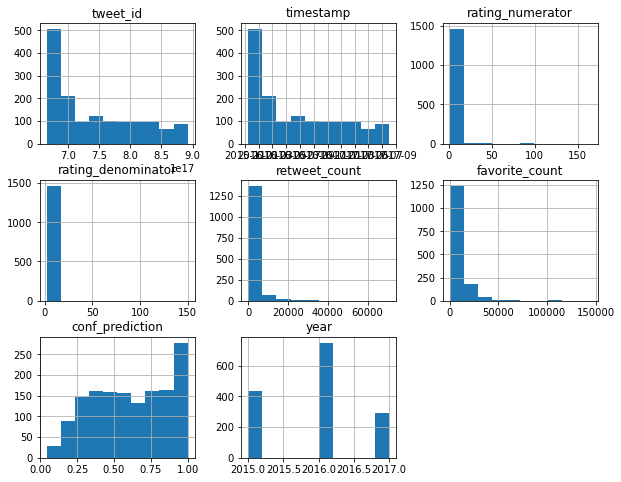

In [52]:
twitter_archive_clean.hist(figsize = (10, 8));

The visual as seen above is to get an overall outlook at the distribution of the data using histogram plots.

### In what year did we have the highest tweets?

In [53]:
tweets_by_year = twitter_archive_clean.groupby('year', as_index = False)['tweet_id'].count()
tweets_by_year

,year,tweet_id
0,2015,438
1,2016,750
2,2017,289


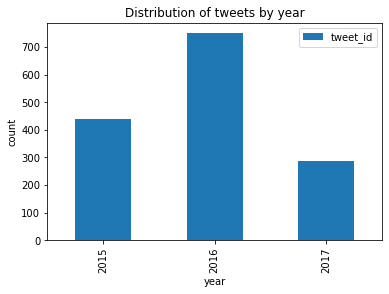

In [54]:
tweets_by_year.plot(x = 'year', y = 'tweet_id', kind = 'bar', 
                   title = 'Distribution of tweets by year', ylabel = 'count');

In [55]:
count_by_year = twitter_archive_clean.groupby('year', as_index = False)['retweet_count', 'favorite_count'].sum()
count_by_year

<ipython-input-55-27b6af92be9d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  count_by_year = twitter_archive_clean.groupby('year', as_index = False)['retweet_count', 'favorite_count'].sum()


,year,retweet_count,favorite_count
0,2015,400662,1054984
1,2016,2216177,5312606
2,2017,1293791,4902178


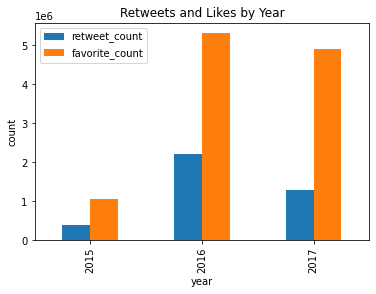

In [56]:
count_by_year.plot(x = 'year', y = ['retweet_count', 'favorite_count'], kind = 'bar', 
                   title = 'Retweets and Likes by Year', ylabel = 'count');

### Which of the Dog Breeds are the most liked?

In [57]:
dog_breeds = twitter_archive_clean.groupby('dog_breed', as_index = False)['favorite_count'].sum().sort_values('favorite_count', ascending = [False])
dog_breeds = dog_breeds.head(10)
dog_breeds

,dog_breed,favorite_count
87,golden_retriever,1172580
47,Pembroke,850333
35,Labrador_retriever,829393
15,Chihuahua,651550
99,pug,364652
53,Samoyed,342718
79,chow,320145
93,malamute,304279
48,Pomeranian,273847
59,Staffordshire_bullterrier,266242


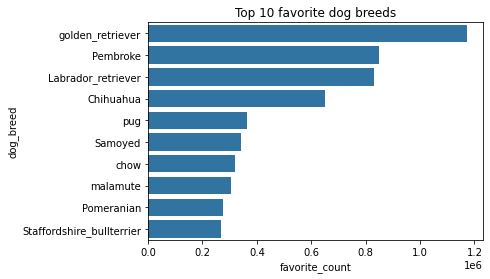

In [58]:
sns.barplot(x = 'favorite_count', y = 'dog_breed', data = dog_breeds, color = sns.color_palette()[0]).set(title = 'Top 10 favorite dog breeds');

In [59]:
dog_breeds_retweet = twitter_archive_clean.groupby('dog_breed', as_index = False)['retweet_count'].sum().sort_values('retweet_count', ascending = [False])
dog_breeds_retweet = dog_breeds_retweet.head(10)
dog_breeds_retweet

,dog_breed,retweet_count
87,golden_retriever,431801
47,Pembroke,276078
35,Labrador_retriever,266836
15,Chihuahua,247327
93,malamute,130223
99,pug,127378
53,Samoyed,108805
79,chow,99655
81,cocker_spaniel,93789
48,Pomeranian,92929


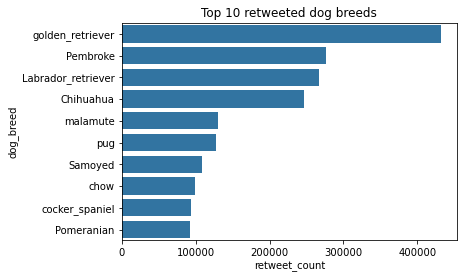

In [60]:
import seaborn as sns
sns.barplot(x = 'retweet_count', y = 'dog_breed', data = dog_breeds_retweet, color = sns.color_palette()[0]).set(title = 'Top 10 retweeted dog breeds');

### Is there any correlation between retweets and Likes?

In [61]:
correlation_check = twitter_archive_clean.retweet_count.corr(twitter_archive_copy.favorite_count)
print ("Correlation between ", 'retweets', " and ", 'likes', "is: ", round(correlation_check, 2),)

Correlation between  retweets  and  likes is:  0.79


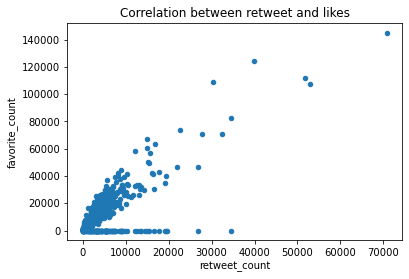

In [62]:
twitter_archive_clean.plot.scatter(x = 'retweet_count', y = 'favorite_count', title = 'Correlation between retweet and likes');

### What is the average confidence prediction level of the dog breed in the dataset?

In [63]:
avg_confidence_prediction = twitter_archive_clean['conf_prediction'].mean() * 100
print('The average confidence prediction level of dog breeds in the dataset is',round(avg_confidence_prediction,2),'%')

The average confidence prediction level of dog breeds in the dataset is 61.44 %


### Insights:
1. The year 2016 had the highest count of tweets which in turn transalates into highest number of retweets and likes (favorite count). We can also see from the dataset that there are more likes than the retweets<br><br>

2. Golden retrievers seem to be the most liked dog breed as they carry the highest count of retweets and likes. <br><br>

3. On an average the confidence prediction level of dog breeds for this dataset is 0.61 which is about 61%.

### Conclusion
>- We have come a long way in this data wrangling project, from gathering to assessing to cleaning and then finally analysing. This project focused on data wrangling efforts to gather data from the Tweet archive of Twitter user @dog_rates, also known as **WeRateDogs** who rates people's dogs with humorous comments about the dog. Using datasets from 3 different sources (one of which was provided), I went ahead to clean the data to make it of a higher quality and create a tidy data.<br><br>
>- From the master dataset that I finally created, we are able to see that we have the highest count of tweets in the year 2016; this might have been caused by some of the data cleaning process however based on the requirements for this project we can say that the year 2016 was the year we had the most original tweets with images.<br><br>
>- Also, It is clear that the most liked dog breed is the **Golden Retriever**, it was also the most retweeted breed, this led us to check if there is any type of correlation between retweet and likes. The data showed a strong positive correlation of 0.79%, however further anlaysis will be required to confirm these findings.<br><br>
>- Finally we also see that the confidence level of the algorithm used for predictions in this dataset on an average is about 61.4% 

### References
>- https://stackoverflow.com/questions/17978133/python-pandas-merge-only-certain-columns
>- http://net-informations.com/ds/pd/dnan.htm
>- https://datascience.stackexchange.com/questions/53676/how-to-delete-a-row-if-a-values-in-a-column-is-not-nan
>- https://www.tutorialspoint.com/how-to-get-the-correlation-between-two-columns-in-pandas#:~:text=Initialize%20two%20variables%2C%20col1%20and,Print%20the%20correlation%20value%2C%20corr.
>- https://www.codementor.io/@aviaryan/downloading-files-from-urls-in-python-77q3bs0un
>- https://classroom.udacity.com/nanodegrees/nd002-alg-t2/parts/cd0015/modules/d9096168-9307-4d7f-8731-f07fa3cfbca4/lessons/ls2232/concepts/aa514310-e2cf-43d9-8165-aa6dd3b8472d
>- https://stackoverflow.com/questions/31431002/unable-to-import-tweepy-module
>- https://video.udacity-data.com/topher/2018/November/5bfc35b7_twitter-api/twitter-api.rtf